# Breast Cancer Classification using KNN

## 1) Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

## 2) Import CSV data

In [2]:
input_data = pd.read_csv("data/data.csv")
input_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3) Check for missing values

* ```id``` contains the Patient ID and can be removed
* As we can see from the count values, there are no missing fields
* The last column ```Unnamed: 32``` contains a lot of NaN values and can be removed

In [3]:
input_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 4) Define input and output variables

* The ```diagnosis``` column contains the ground truths whether the cancer is benign or malignant
* We first transform those values to binary and assign to output variable
* We then drop the unnecessary columns from original data and assign to input variable

In [4]:
label_map = {
    'M': 1,
    'B': 0
}

input_data['diagnosis'] = input_data['diagnosis'].map(label_map)

Y = input_data.diagnosis
X = input_data.drop(['Unnamed: 32','id','diagnosis'], axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 5) Visualize dataset

* First we plot the distribution of groundtruths
* We then plot a swarmplot for the first 20 features after standardizing data
* It shows the distribution of the two classes for each feature

Benign:  357
Malignant :  212


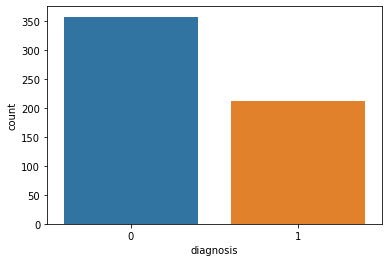

In [5]:
ax = sns.countplot(Y ,label="Count") 
B, M = Y.value_counts()

print('Benign: ',B)
print('Malignant : ',M)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

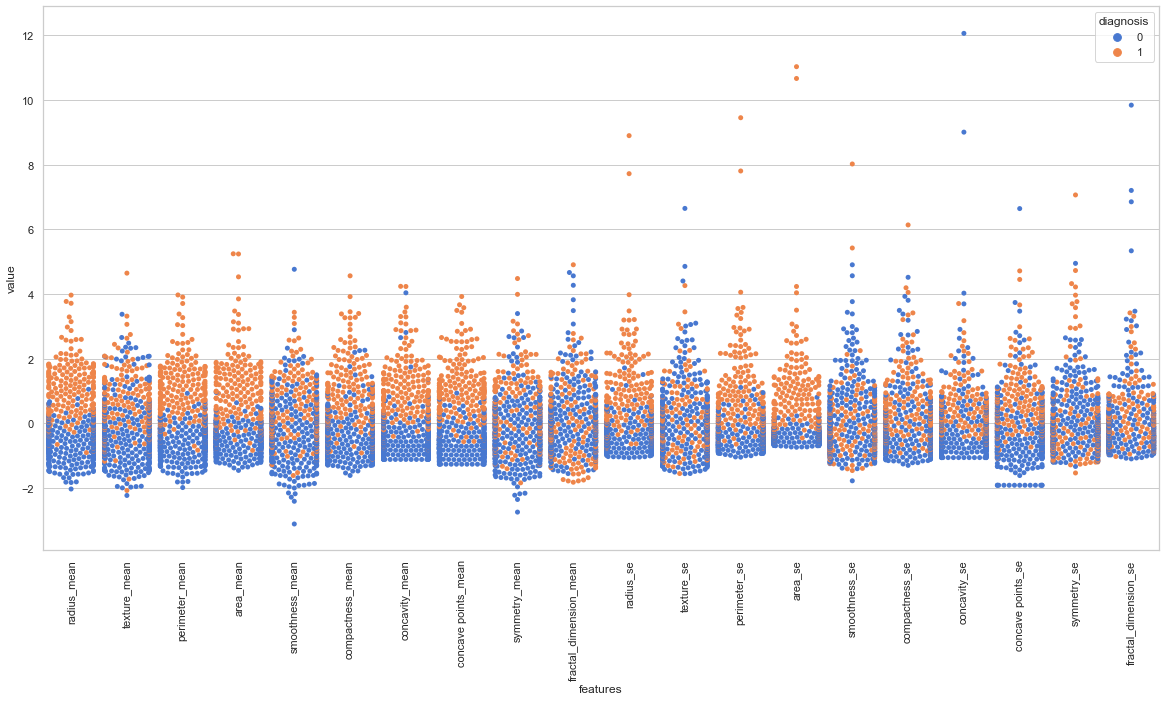

In [6]:
sns.set(style="whitegrid", palette="muted")

output_d = Y
input_d = X
input_d = (input_d - input_d.mean()) / (input_d.std())              
input_d = pd.concat([output_d,input_d.iloc[:,0:20]],axis=1)
input_d = pd.melt(input_d,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=input_d)

plt.xticks(rotation=90)

## 6) Plot heatmap

* This allows us to find how much the features are co-related to each other, so that we can remove some of them during feature selection

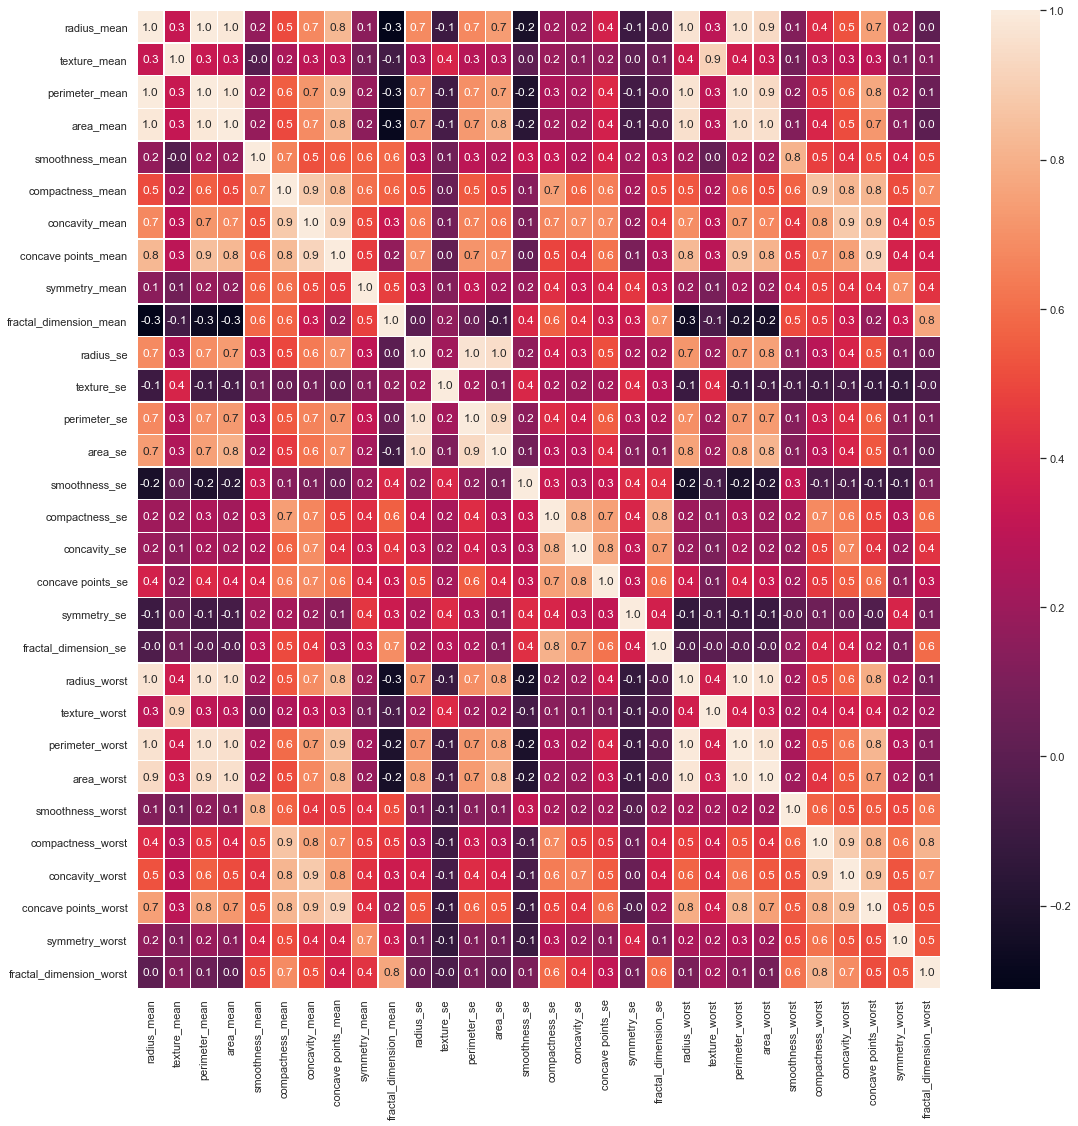

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 7) Feature Selection 

```radius_mean```, ```area_mean```, ```perimeter_mean``` are correlated. If you notice the swarmplot for ```area_mean```, it differentates classes clearly than the other two. Hence, we'll only use ```area_mean```

```compactness_mean```, ```concavity_mean``` and ```concave points_mean``` are correlated. We'll only use ```concavity_mean```

```radius_se```, ```perimeter_se``` and ```area_se``` are correlated. We'll only use ```area_se```

```radius_worst```, ```perimeter_worst``` and ```area_worst``` are correlated. We'll only use ```area_worst```

```compactness_worst```, ```concavity_worst``` and ```concave points_worst``` are correlated. We'll only use ```concavity_worst```

```compactness_se```, ```concavity_se``` and ```concave points_se``` are correlated. We'll only use ```concavity_se```

```texture_mean``` and ```texture_worst``` are correlated. We'll only use ```texture_mean```

```area_worst``` and ```area_mean``` are correlated. We'll only use ```area_mean```

In [8]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']

mod_X = X.drop(drop_list1, axis = 1)    

print("Original Data ::")
print("Samples: {}, Features: {}\n".format(X.shape[0],X.shape[1]))

print("Data after feature selection ::")
print("Samples: {}, Features: {}\n".format(mod_X.shape[0],mod_X.shape[1]))

mod_X.head()

Original Data ::
Samples: 569, Features: 30

Data after feature selection ::
Samples: 569, Features: 16



,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


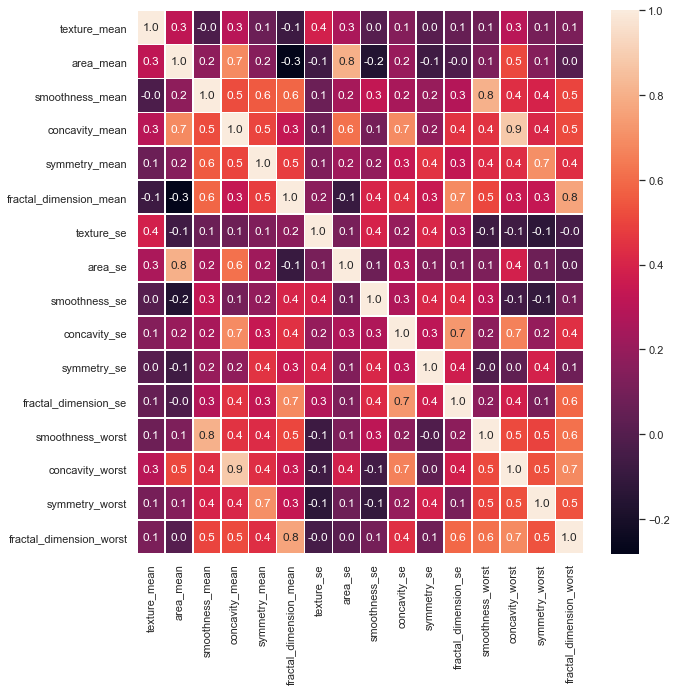

In [9]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mod_X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 8) Normalize Data

* Its considered good practice to standardize input to have zero mean and unit variance
* This helps the model while converging 

In [10]:
mod_X = StandardScaler().fit(mod_X).transform(mod_X.astype(float))
mod_X[0]

array([-2.07333501,  0.9843749 ,  1.56846633,  2.65287398,  2.21751501,
        2.25574689, -0.56526506,  2.48757756, -0.21400165,  0.72402616,
        1.14875667,  0.90708308,  1.30768627,  2.10952635,  2.75062224,
        1.93701461])

## 9) Split Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(mod_X, Y, test_size=0.2)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (455, 16) (455,)
Test set: (114, 16) (114,)


## 10) Define a KNN model

* Find out the value of *k* for which we get maximum accuracy value
* And then use that value to fit the model

In [12]:
k = [x for x in range(2,11)]
train_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    #print(knn)
    history = knn.fit(x_train,y_train)
    train_acc = accuracy_score(y_train, knn.predict(x_train))
    train_scores.append(train_acc)
    
for i in k:
    print("For K = {}, acc = {}".format(i, train_scores[i-2]))
    
print("\nMaximum Accuracy {:.3f} when K = {}".format(max(train_scores), train_scores.index(max(train_scores))+2))

For K = 2, acc = 0.9648351648351648
For K = 3, acc = 0.9758241758241758
For K = 4, acc = 0.9692307692307692
For K = 5, acc = 0.967032967032967
For K = 6, acc = 0.9560439560439561
For K = 7, acc = 0.9582417582417583
For K = 8, acc = 0.9516483516483516
For K = 9, acc = 0.9582417582417583
For K = 10, acc = 0.9516483516483516

Maximum Accuracy 0.976 when K = 3


In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
history = knn.fit(x_train,y_train)

## 11) Run predictions on the test set

* Classification Report and Confusion Matrix are also plotted

In [14]:
preds = knn.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, knn.predict(x_train)))

print("\nTest set Accuracy: ", accuracy_score(y_test, preds))

Train set Accuracy:  0.9758241758241758

Test set Accuracy:  0.9649122807017544


In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        80
           1       0.92      0.97      0.94        34

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [16]:
print("Confusion Matrix: \n",confusion_matrix(y_test, preds))

print("\nROC AUC Score: {:.3f}".format(roc_auc_score(y_test, preds)))

Confusion Matrix: 
 [[77  3]
 [ 1 33]]

ROC AUC Score: 0.967
